In [1]:
import pandas as pd
import numpy as np
from brainsurf.data.eeg_data import EEGDataFactory



In [2]:
factory = EEGDataFactory()
pre_data = factory.create_eeg_data(input_file='brainsurf/data/samples/anirudh/ani_pre.csv')
post_data = factory.create_eeg_data(input_file='brainsurf/data/samples/anirudh/ani_post.csv')

In [3]:
keys = pre_data.keys()
print(keys)

Index(['raw'], dtype='object')


In [4]:
pre_data.head(n_samples=5)

AttributeError: 'EEGData' object has no attribute 'head'

In [ ]:
raw_values = pre_data.get_data()['raw']  # Retrieve the values for the 'raw' key
print(raw_values)

0         6.62842
1         8.48999
2        10.19900
3        10.77270
4         9.65576
           ...   
36351     4.75464
36352    -0.03662
36353    -4.13818
36354     0.12207
36355     2.56958
Name: EEG, Length: 36356, dtype: float64


In [5]:
# Load pre and post-meditation data from CSV files
raw_data = pre_data.get_data()['raw']
pre_data = pd.DataFrame({'data': raw_data})

In [6]:
# Load pre and post-meditation data from CSV files
raw_data = post_data.get_data()['raw']
post_data = pd.DataFrame({'data': raw_data})

In [7]:
min_len = min(len(pre_data), len(post_data))
pre_data = pre_data[:min_len]
post_data = post_data[:min_len]
print(min_len)

36356


In [8]:
from brainsurf.comparitive_analysis.meditation_comparision import EEGComparison

eeg_comparison = EEGComparison(pre_data, post_data)

# Extract features
features = eeg_comparison.extract_features()


print(features)

[0. 0. 0. ... 0. 0. 0.]


/Users/raspras/Library/Python/3.9/lib/python/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 1024 is greater than input length  = 1, using nperseg = 1
  warnings.warn('nperseg = {0:d} is greater than input length '


In [9]:
import matplotlib.pyplot as plt
# Compute the mean and standard deviation of each feature for pre and post-meditation states
pre_data_len=len(pre_data)
post_data_len=len(post_data)
pre_mean = np.mean(features[:pre_data_len], axis=0)
pre_std = np.std(features[:pre_data_len], axis=0)
post_mean = np.mean(features[:post_data_len], axis=0)
post_std = np.std(features[:post_data_len], axis=0)

# Plot the mean and standard deviation of each feature
plt.figure(figsize=(8,6))
plt.errorbar(np.arange(len(pre_mean))+1, pre_mean, yerr=pre_std, fmt='o', label='Pre-meditation')
plt.errorbar(np.arange(len(post_mean))+1, post_mean, yerr=post_std, fmt='o', label='Post-meditation')
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.title('Comparative Analysis of Pre and Post-Meditation EEG Data')
plt.legend()
plt.show()

TypeError: object of type 'numpy.float64' has no len()

<Figure size 800x600 with 0 Axes>

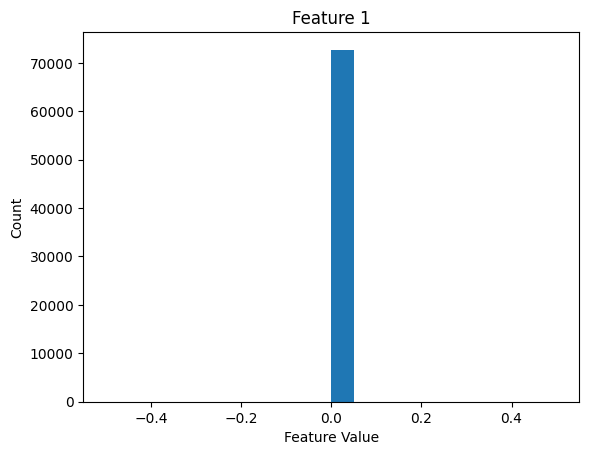

In [10]:
import matplotlib.pyplot as plt
# Plot the distribution of each feature
features = features.reshape(-1, 1)

for i in range(features.shape[1]):
    plt.figure()
    plt.hist(features[:,i], bins=20)
    plt.xlabel('Feature Value')
    plt.ylabel('Count')
    plt.title(f'Feature {i+1}')


In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

target = np.concatenate([np.zeros(len(pre_data)), np.ones(len(post_data))])
target = target.reshape(-1, 1)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.49838410231726604


/Users/raspras/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load pre and post-meditation data from CSV files
pre_data = pd.read_csv('pre_meditation_data.csv')['data'].values
post_data = pd.read_csv('post_meditation_data.csv')['data'].values

# Create EEGComparison object
eeg_comparison = EEGComparison(pre_data, post_data)

# Extract features
features = eeg_comparison.extract_features()

# Create a binary target variable indicating whether the data is pre or post-meditation
target = np.concatenate([np.zeros(len(pre_data)), np.ones(len(post_data))])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


FileNotFoundError: [Errno 2] No such file or directory: 'pre_meditation_data.csv'